## Data

In [1]:
import brainscore_language as bsc
import numpy as np
from matplotlib import pyplot

C:\ProgramData\Miniconda3\envs\bmm22language\lib\site-packages\brainscore_core\metrics\__init__.py:37: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


In [2]:
language_data = bsc.load_dataset('Pereira2018.language_system')
print(language_data)

<xarray.NeuroidAssembly 'data' (presentation: 627, neuroid: 13553)>
array([[-0.61048431, -0.76491186, -0.79946189, ..., -1.02996304,
        -0.42042251,  0.44600733],
       [ 1.74291344,  2.00353428,  1.97103177, ..., -0.61647686,
        -0.76818191,  2.11936498],
       [ 1.01231271,  1.51301567,  1.09312979, ...,  0.6470509 ,
         0.18632258,  2.85344239],
       ...,
       [ 0.4911479 ,  0.97394189,  0.14704561, ...,  0.97622657,
         1.07466326,  0.65786844],
       [ 1.0331004 ,  1.5348565 ,  0.84328902, ..., -0.8361398 ,
        -0.52408963,  0.73715778],
       [ 0.53970481,  0.98636439,  0.53409886, ..., -0.03957355,
        -0.06988947,  2.10925683]])
Coordinates:
  * presentation      (presentation) MultiIndex
  - stimulus_num      (presentation) int64 0 0 1 1 2 2 ... 379 380 381 382 383
  - sentence          (presentation) object 'An accordion is a portable music...
  - stimulus          (presentation) object 'An accordion is a portable music...
  - passage_index

In [3]:
auditory_data = bsc.load_dataset('Pereira2018.auditory')
print(auditory_data)

<xarray.NeuroidAssembly 'data' (presentation: 627, neuroid: 5692)>
array([[ 0.68092518,  0.63900351, -0.20867088, ..., -0.45452631,
        -0.03092201,  0.57868715],
       [-0.23841821, -0.14182175,  0.67227796, ...,  0.69823596,
         0.47090873,  0.87556353],
       [ 0.53387987,  0.45148941, -0.24180219, ..., -1.38130661,
        -0.80479636, -0.36178319],
       ...,
       [-0.16772716, -0.13755608,  0.34265821, ...,  0.86163011,
         0.65541437,  1.61356854],
       [-0.36079611, -0.37692265,  0.71815238, ...,  1.08892836,
         1.25366104,  2.31186954],
       [-1.09236993, -1.14955853, -0.36788984, ...,  0.44330099,
         0.71736145,  1.65385607]])
Coordinates:
  * presentation      (presentation) MultiIndex
  - stimulus_num      (presentation) int64 0 0 1 1 2 2 ... 379 380 381 382 383
  - passage_index     (presentation) int64 1 1 1 1 1 1 1 ... 95 95 96 96 96 96
  - passage_label     (presentation) object 'Accordion' 'beekeeping' ... 'Woman'
  - passage_category

C:\Users\Martin\AppData\Local\Temp\ipykernel_26112\97946210.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


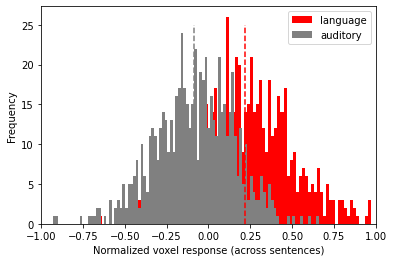

In [4]:
# plot difference
fig, ax = pyplot.subplots()
nbins = 100
ax.hist(language_data.median('neuroid').values.flatten(), bins=nbins, color='red', label='language')
ax.hist(auditory_data.median('neuroid').values.flatten(), bins=nbins, color='gray', label='auditory')
language_mean = language_data.median('neuroid').mean()
auditory_mean = auditory_data.median('neuroid').mean()
ax.plot([language_mean, language_mean], [0, 25], color='red', linestyle='dashed')
ax.plot([auditory_mean, auditory_mean], [0, 25], color='gray', linestyle='dashed')
ax.set_xlim([-1, 1])
ax.set_xlabel('Normalized voxel response (across sentences)')
ax.set_ylabel('Frequency')
ax.legend()
fig.show()

Model

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_id = 'distilgpt2'  # use 'gpt2-xl' for better results (requires downloading 6GB of weights)

model = AutoModelForCausalLM.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [6]:
def predict_next_word(text):
    tokenized_inputs = tokenizer(text, return_tensors="pt")

    with torch.no_grad():
        output = model(**tokenized_inputs)

    logits = output.logits
    pred_id = torch.argmax(logits, axis=2).squeeze()
    last_model_token_inference = pred_id[-1].tolist()
    next_word = tokenizer.decode(last_model_token_inference)
    print(f"{text} >> {next_word}")


predict_next_word('the quick brown fox')
predict_next_word('the quick brown fox jumps over the lazy')
predict_next_word('brains, minds, and')

the quick brown fox >> es
the quick brown fox jumps over the lazy >>  fox
brains, minds, and >>  minds


Benchmarking model-brain comparisons

In [7]:
def hack_because_library_in_alpha(model_activity, stimulus_id):
    model_activity = model_activity.reset_index('presentation')
    model_activity['stimulus_id'] = 'presentation', [stimulus_id]
    model_activity = model_activity.set_index(presentation=['context', 'stimulus_id'])
    return model_activity

In [8]:
from brainscore_language.artificial_subject import ArtificialSubject
from brainscore_language.models.huggingface import HuggingfaceSubject
from brainio.assemblies import merge_data_arrays
from tqdm import tqdm

artificial_subject = HuggingfaceSubject(
    model_id='distilgpt2',
    region_layer_mapping={ArtificialSubject.RecordingTarget.language_system:
                              'transformer.h.5.mlp.dropout'})

# the following is what a benchmark might run:
# - run same experiment on model
artificial_subject.perform_neural_recording(
    recording_target=ArtificialSubject.RecordingTarget.language_system,
    recording_type=ArtificialSubject.RecordingType.spikerate_exact)
model_activities = []
for stimulus_id, text in tqdm(
        zip(language_data['stimulus_id'].values, language_data['stimulus'].values),
        desc='run stimuli on model', total=len(language_data['presentation'])):
    model_activity = artificial_subject.digest_text(text)['neural']
    model_activity = hack_because_library_in_alpha(model_activity, stimulus_id)
    model_activities.append(model_activity)
model_activities = merge_data_arrays(model_activities)
print(model_activities)

# - score model predictions on data (we're ignoring ceilings here)
metric = bsc.load_metric('linear_predictivity', crossvalidation_kwargs=dict(
    split_coord='stimulus_id'))
target_data = language_data.dropna('neuroid')  # some subjects have only done one experiment
raw_score = metric(model_activities, target_data)
print(raw_score)
ceiling = 0.32  # from paper
score = raw_score / ceiling
print(score)


run stimuli on model: 100%|██████████| 627/627 [00:47<00:00, 13.31it/s]


<xarray.NeuroidAssembly (presentation: 627, neuroid: 768)>
array([[-0.876441  ,  0.100577  ,  1.3807594 , ...,  0.94760895,
         1.2632831 , -0.23020035],
       [-0.8609741 ,  0.00902465,  2.686772  , ...,  0.3886986 ,
         2.2277107 ,  0.71726346],
       [ 0.05453134,  0.06689322, -0.1958804 , ...,  0.779179  ,
         0.26571858,  0.5545976 ],
       ...,
       [-2.4832854 ,  1.9607823 ,  1.2738047 , ...,  0.36847126,
         2.5284534 ,  0.5072168 ],
       [ 0.958543  , -0.17880774,  1.3926065 , ...,  0.2954378 ,
         1.3826574 , -2.094374  ],
       [-0.20919693,  0.983678  , -1.0539823 , ...,  0.83493847,
         2.5720212 , -2.097294  ]], dtype=float32)
Coordinates:
  * presentation            (presentation) MultiIndex
  - context                 (presentation) object 'A banana is a long fruit t...
  - stimulus_id             (presentation) object '384sentences.24' ... '384s...
  * neuroid                 (neuroid) MultiIndex
  - layer                   (neuroi

cross-validation: 100%|██████████| 10/10 [01:58<00:00, 11.87s/it]

<xarray.Score (aggregation: 2)>
array([0.08231155, 0.00802337])
Coordinates:
  * aggregation  (aggregation) <U6 'center' 'error'
Attributes:
    raw:      <xarray.Score (split: 10, neuroid: 6669)>\narray([[ 0.08533892,...
<xarray.Score (aggregation: 2)>
array([0.25722359, 0.02507303])
Coordinates:
  * aggregation  (aggregation) <U6 'center' 'error'
